In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

In [85]:
diabetes = load_diabetes()
x, y = diabetes.data, diabetes.target
df = pd.DataFrame(x, columns=diabetes.feature_names)

#Информация о данных

In [86]:
#размерность
df.shape

(442, 10)

In [87]:
#Первые строки
df.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [88]:
diabetes.DESCR[:500]

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n:Number of Instances: 442\n\n:Number of Attributes: First 10 columns are numeric predictive values\n\n:Target: Column 11 is a quantitative measur'

In [89]:
x = df.copy()
y = diabetes.target

In [90]:
x.shape

(442, 10)

In [91]:
y.shape
y[:10]

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310.])

DateFrame с целевой переменной для анализа

In [92]:
df_full = df.copy()
df_full['target'] = y

#Разведочный анализ

In [93]:
print("Статистика признаков")
x.describe()

Статистика признаков


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


In [94]:
print("Статистика целевой переменной")
print("Максимум:", y.max())
print("Минимум:", y.min())
print(f"Среднее: {y.mean():.2f}")
print(f"Стандартное отклонение: {y.std():.2f}")

Статистика целевой переменной
Максимум: 346.0
Минимум: 25.0
Среднее: 152.13
Стандартное отклонение: 77.01


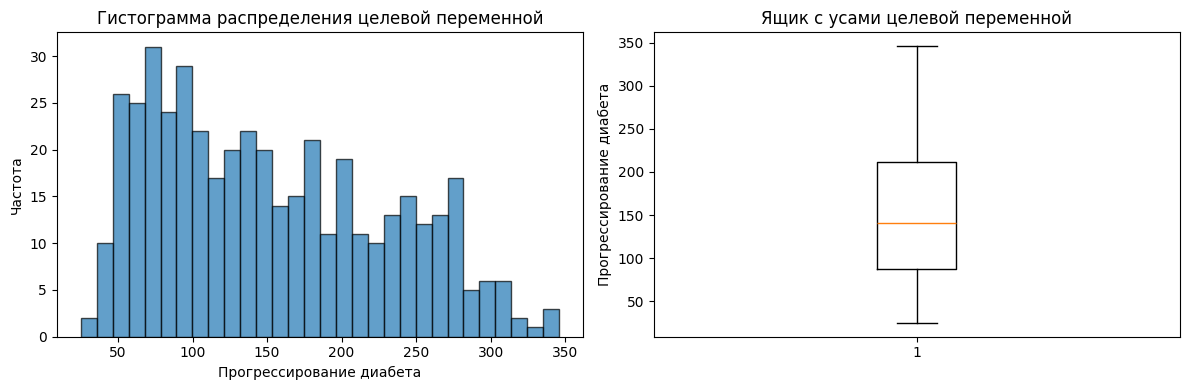

In [95]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(y, bins=30, edgecolor="black", alpha=0.7)
plt.xlabel("Прогрессирование диабета")
plt.ylabel("Частота")
plt.title("Гистограмма распределения целевой переменной")

plt.subplot(1, 2, 2)
plt.boxplot(y)
plt.ylabel("Прогрессирование диабета")
plt.title("Ящик с усами целевой переменной")

plt.tight_layout()
plt.show()

In [96]:
correlations = df_full.corr()['target'].sort_values(ascending=False)
print("Корреляция признаков с целевой переменной")
print(correlations)

Корреляция признаков с целевой переменной
target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64


#Выводы

*   Распределение целевой переменной пик в районе от 50 до 150
*   Медиана около 150, большая часть данных в районе от 100 до 200
*   Признак bmi (индекс массы тела) и s5 (важный биохимический показатель, наверное) имеют наибольшую корреляцию с прогрессированием диабета




#Предобработка и распределение на выборки

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle

In [98]:
#разделение
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)

(353, 10)
(89, 10)


In [99]:
#Стандартизация
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [100]:
#До стандартизации
x_train.iloc[:3].values

array([[ 0.07076875,  0.05068012,  0.01211685,  0.0563009 ,  0.03420581,
         0.04941617, -0.03971921,  0.03430886,  0.02736405, -0.0010777 ],
       [-0.00914709,  0.05068012, -0.01806189, -0.03321323, -0.0208323 ,
         0.01215151, -0.07285395,  0.07120998,  0.00027248,  0.01963284],
       [ 0.00538306, -0.04464164,  0.04984027,  0.09761511, -0.01532849,
        -0.016345  , -0.00658447, -0.00259226,  0.01703607, -0.01350402]])

In [101]:
#После стандартизации
x_train_scaled[:3]

array([[ 1.49836523,  1.06136988,  0.21990201,  1.13887373,  0.72847289,
         1.05589332, -0.82445065,  0.71103773,  0.54748197, -0.06144896],
       [-0.22885822,  1.06136988, -0.41936607, -0.71059105, -0.4249289 ,
         0.27242452, -1.52979055,  1.4842858 , -0.01975653,  0.36723647],
       [ 0.08518241, -0.94217861,  1.01898711,  1.99247286, -0.30958872,
        -0.32669867, -0.11911075, -0.06221033,  0.3312366 , -0.31866022]])

In [102]:
print(f"\nПроверка стандартизации:")
print(f"Среднее тренировочной выборки: {np.mean(x_train_scaled, axis=0).round(2)}")
print(f"Стандартное отклонение тренировочной выборки: {np.std(x_train_scaled, axis=0).round(2)}")


Проверка стандартизации:
Среднее тренировочной выборки: [-0. -0. -0.  0. -0. -0.  0. -0. -0.  0.]
Стандартное отклонение тренировочной выборки: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


#Обучение модели

In [103]:
models = {
    'Linear Regression' : LinearRegression(),
    'Random Forest' : RandomForestRegressor(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
  print(f"Модель: {name}")
  model.fit(x_train_scaled, y_train)

  y_pred = model.predict(x_test_scaled)

  #Метрики
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  results[name] = {
      'model' : model,
      'predictions' : y_pred,
      'mae' : mae,
      'mse' : mse,
      'r2' : r2
  }

  print(f"MAE: {mae:.2f}")
  print(f"MSE: {mse:.2f}")
  print(f"R2: {r2:.2f}")

Модель: Linear Regression
MAE: 42.79
MSE: 2900.19
R2: 0.45
Модель: Random Forest
MAE: 44.17
MSE: 2959.18
R2: 0.44


#Сравнение

In [104]:
comparison_df = pd.DataFrame({
    'Модель': list(results.keys()),
    'MAE' : [results[name]['mae'] for name in results],
    'MSE' : [results[name]['mse'] for name in results],
    'R2' : [results[name]['r2'] for name in results],
}).sort_values("R2", ascending=False)

In [105]:
print(comparison_df)

              Модель        MAE          MSE        R2
0  Linear Regression  42.794095  2900.193628  0.452603
1      Random Forest  44.171236  2959.180562  0.441469


# Анализ результатов

Метрики
R2 = 0.45 модель объясняет 45% дисперсии данных умеренный результат для медицинских данных
MAE  - 43 - означает средняя ошибка +- 43 единицы

In [106]:
print(f"При этом диапазон целевой переменной: от {y.min()} до {y.max()}")

При этом диапазон целевой переменной: от 25.0 до 346.0


#Визуализация предсказанных и реальных значений

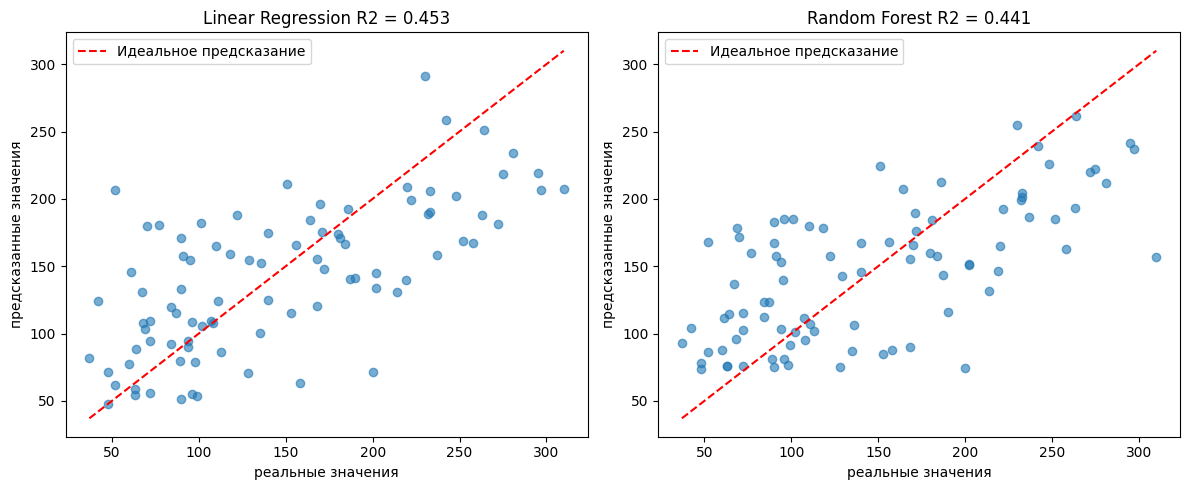

In [107]:
plt.figure(figsize=(12, 5))

for i, (name, result) in enumerate(results.items(), 1):
  plt.subplot(1, 2, i)

  plt.scatter(y_test, result['predictions'], alpha=0.6)

  #Идеальная линия предсказания
  min_val = min(y_test.min(), result['predictions'].min())
  max_val = max(y_test.max(), result['predictions'].max())

  plt.plot([min_val, max_val], [min_val, max_val], 'r--', label="Идеальное предсказание")

  plt.xlabel("реальные значения")
  plt.ylabel("предсказанные значения")
  plt.title(f'{name} R2 = {result["r2"]:.3f}')
  plt.legend()


plt.tight_layout()
plt.show()

# Анализ важности признаков для Random Forest

In [108]:

rf_model = results['Random Forest']['model']
feature_importance = pd.DataFrame({
    'feature': diabetes.feature_names,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print(feature_importance)



  feature  importance
2     bmi    0.355469
8      s5    0.230957
3      bp    0.088408
9      s6    0.071329
0     age    0.058642
5      s2    0.057227
4      s1    0.052784
6      s3    0.051339
7      s4    0.024213
1     sex    0.009633


# Визуализация важности признаков

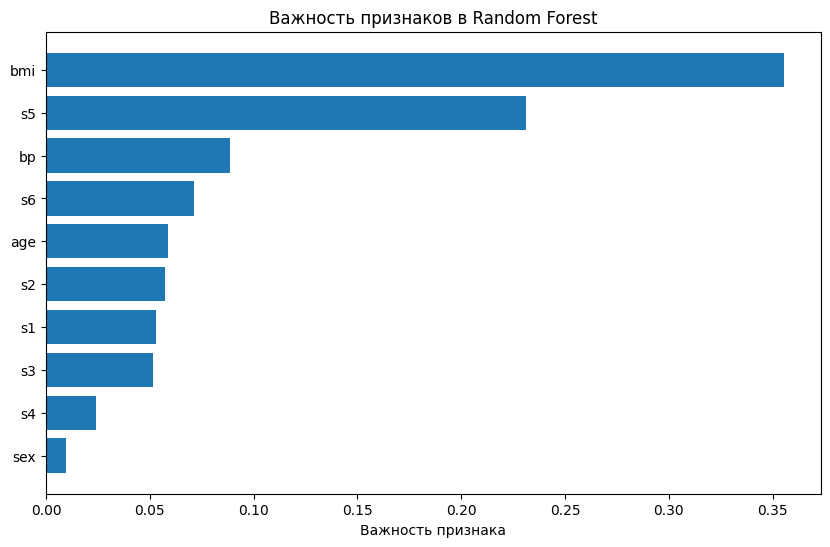

In [109]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.xlabel('Важность признака')
plt.title('Важность признаков в Random Forest')
plt.gca().invert_yaxis()
plt.show()

Сохранение лучшей модели

In [112]:
#Выбрана лучшая модель по R2
best_model_name = comparison_df.iloc[0]['Модель']
best_model = results[best_model_name]['model']
print(f"Лучшая модель: {best_model_name}")

Лучшая модель: Linear Regression


Сохранение

In [113]:
with open('best_diabetes_model.pkl', 'wb') as f:
    pickle.dump({
        'model': best_model,
        'scaler': scaler,
        'feature_names': diabetes.feature_names
    }, f)

#Демонтрация работы сохраненной модели

In [114]:
with open('best_diabetes_model.pkl', 'rb') as f:
    saved_objects = pickle.load(f)

In [115]:
loaded_model = saved_objects['model']
loaded_scaler = saved_objects['scaler']
feature_names = saved_objects['feature_names']

In [117]:
# Берем оригинальные данные до стандартизации
if hasattr(x_test, 'iloc'):  # Если это DataFrame
    new_data_original = x_test.iloc[:1].values
    actual_value = y_test.iloc[0] if hasattr(y_test, 'iloc') else y_test[0]
else:  # Если это numpy array
    new_data_original = x_test[:1]
    actual_value = y_test[0]

In [118]:
for i, (name, value) in enumerate(zip(feature_names, new_data_original[0])):
    print(f"  {name}: {value:.4f}")

  age: 0.0453
  sex: -0.0446
  bmi: -0.0062
  bp: -0.0160
  s1: 0.1250
  s2: 0.1252
  s3: 0.0192
  s4: 0.0343
  s5: 0.0324
  s6: -0.0052


In [119]:
new_data_scaled = loaded_scaler.transform(new_data_original)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [120]:
prediction = loaded_model.predict(new_data_scaled)

In [121]:
print(f"Результат предсказания:")
print(f"Предсказанное значение: {prediction[0]:.2f}")
print(f"Реальное значение: {actual_value}")
print(f"Ошибка предсказания: {abs(prediction[0] - actual_value):.2f}")
print(f"Точность предсказания: {100 - (abs(prediction[0] - actual_value) / actual_value * 100):.1f}%")

Результат предсказания:
Предсказанное значение: 139.55
Реальное значение: 219.0
Ошибка предсказания: 79.45
Точность предсказания: 63.7%


#Финальные выводы


#Рекомендации по улучшению модели:
*   Сбор дополнительных медицинских показателей
*   Увеличение размера датасета
*   Эксперименты с другими алгоритмами (XGBoost, Gradient Boosting)
*   Добавление feature engineering




#Практическое применение в медицине:
*   Модель может использоваться для скрининга пациентов




In [122]:
print(f" * Погрешность предсказания: ±{results[best_model_name]['mae']:.0f} единиц")

 * Погрешность предсказания: ±43 единиц


*   Результаты должны интерпретироваться врачами
*   Важно учитывать все клинические показатели
